In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import seaborn as sns
import numpy as np
import re

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
cd ../

/Users/edwardrees/git/side-projects/jax-rl


In [4]:
from src.utils import parse_experiments

In [37]:
def plot_rewards(exp, stage):
    df, trs = parse_experiments(exp, stage)
    fig, axs = plt.subplots(ncols=2, figsize=(15,5))
    sns.lineplot(x='Episode', y='Reward', data=df, ax=axs[0]);
    df.pivot(index='Episode', columns='run', values='Reward').plot(ax=axs[1]);

## CartPole Results

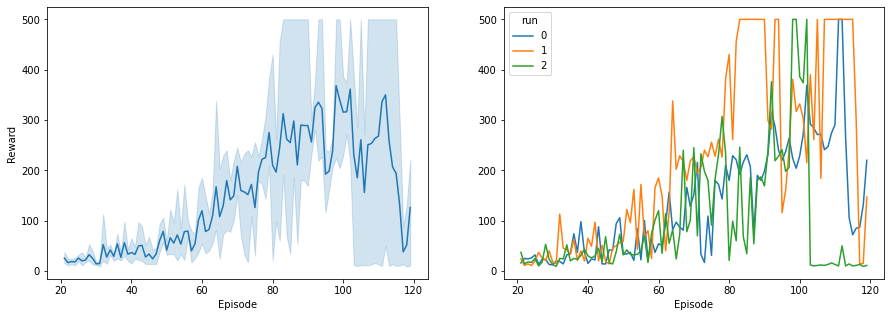

In [38]:
exp = 'out/CartPole-v1/EPS100-LR0.01-DF0.99'
plot_rewards(exp, 'Training')

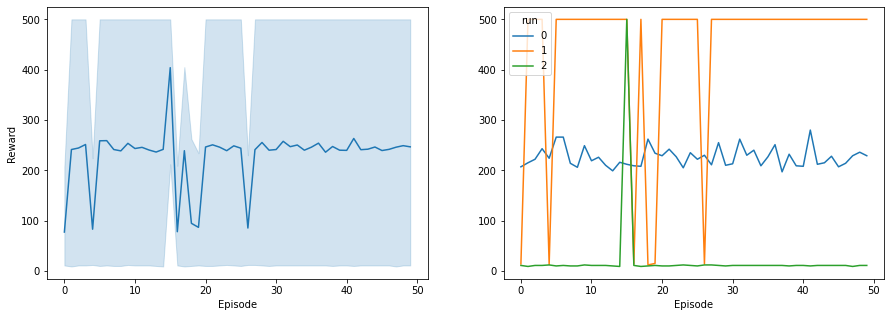

In [39]:
plot_rewards(exp, 'Testing')

^Reinforcement learning is very unstable!

In [40]:
import jax.numpy as jnp

In [42]:
b = jnp.ones(10)

In [47]:
from src.agents.base_agent import ParamRegister

ModuleNotFoundError: No module named 'agents'

In [357]:
class ParamRegister():
    def __init__(self):
        self.register = []

    def register_param(self, name, value):
        self.register.append(name)
        setattr(self, name, value)

    def _flatten_params(self):
        p = {}
        for k in self.register:
            v = getattr(self, k)
            for i, e in enumerate(chain(*v)):
                p[k+f".{i}"] = e
        return p

    @classmethod
    def _unflatten_weights(cls, p):
        params = list(zip(b[::2], b[1::2]))
        return params
    
    @classmethod
    def _read_npz(cls, it):
        tmp = {}
        for k, v in it:
            k1, k2 = k.split('.')
            if k1 in tmp:
                tmp[k1].append(jnp.array(v))
            else:
                tmp[k1] = [jnp.array(v)]
        return tmp

    def save(self, fp_dir):
        # Each attribute that we need to save goes in this dictionary
        p = self._flatten_params()
        jnp.savez(os.path.join(fp_dir, 'params.npz'), **p)
        
        

    @classmethod
    def load(cls, fp_dir):
        fp = os.path.join(fp_dir, "params.npz")
        z = jnp.load(fp).items()
        var = cls._read_npz(z)
        instance = cls()
        for k, v in var.items():
            params = cls._unflatten_weights(v)
            setattr(instance, k, params)
        logger.info(f"Successfully loaded parameters from {fp}")
        return instance

In [358]:
p = ParamRegister()

In [359]:
import jax.numpy as jnp
import jax

In [360]:
import src.model as m
key = jax.random.PRNGKey(0)

In [361]:
a = m.init_network_params([2,32,2], key)
b = m.init_network_params([3,32,2], key)

In [368]:
b

[(DeviceArray([[ 0.74138147,  1.319769  , -0.25972807],
               [-1.1973733 ,  0.57256186,  0.53464484],
               [ 1.0267576 , -1.0177492 , -1.5408337 ],
               [-0.94999564, -2.2068007 ,  0.01136618],
               [-1.2341939 , -0.3280875 , -0.28865   ],
               [ 0.28063557, -0.45770535,  1.3805226 ],
               [-0.3106454 ,  0.16391748,  0.1807494 ],
               [ 1.7538499 , -0.31392106, -0.4988549 ],
               [-0.54205805, -0.9734162 ,  0.09518661],
               [ 0.16025639,  1.1083007 ,  0.4274468 ],
               [ 0.5682078 , -0.16601865,  0.02853318],
               [ 0.25153208,  0.765009  , -0.30264816],
               [ 0.88037914,  0.22201127, -0.6138062 ],
               [-0.00571967,  0.85556704,  1.0244013 ],
               [ 1.1572863 ,  1.7431768 , -0.2374818 ],
               [ 0.82959026,  0.21359093, -0.05610758],
               [-0.80800587, -0.28271767,  0.73497385],
               [-0.6884126 ,  0.3362839 , -0.579

In [362]:
p.register_param('param1', a)
p.register_param('params2', b)

In [363]:
p.save('')

In [364]:
p.load('')

In [371]:
p.params2

[(DeviceArray([[ 0.74138147,  1.319769  , -0.25972807],
               [-1.1973733 ,  0.57256186,  0.53464484],
               [ 1.0267576 , -1.0177492 , -1.5408337 ],
               [-0.94999564, -2.2068007 ,  0.01136618],
               [-1.2341939 , -0.3280875 , -0.28865   ],
               [ 0.28063557, -0.45770535,  1.3805226 ],
               [-0.3106454 ,  0.16391748,  0.1807494 ],
               [ 1.7538499 , -0.31392106, -0.4988549 ],
               [-0.54205805, -0.9734162 ,  0.09518661],
               [ 0.16025639,  1.1083007 ,  0.4274468 ],
               [ 0.5682078 , -0.16601865,  0.02853318],
               [ 0.25153208,  0.765009  , -0.30264816],
               [ 0.88037914,  0.22201127, -0.6138062 ],
               [-0.00571967,  0.85556704,  1.0244013 ],
               [ 1.1572863 ,  1.7431768 , -0.2374818 ],
               [ 0.82959026,  0.21359093, -0.05610758],
               [-0.80800587, -0.28271767,  0.73497385],
               [-0.6884126 ,  0.3362839 , -0.579

In [264]:
z = jnp.load('params.npz')

In [274]:
it = z.items()

In [275]:
tmp = {}
for k, v in it:
    k1, k2 = k.split('.')
    if k1 in tmp:
        tmp[k1].append(v)
    else:
        tmp[k1] = [v]

In [276]:
tmp

{'param1': [array([[-1.1371889 ,  1.1167192 ],
         [ 0.15867284, -1.3650446 ],
         [ 0.31219813,  0.41479695],
         [-0.7912053 , -1.1950786 ],
         [ 0.30279437, -1.2118596 ],
         [ 0.436347  ,  0.6446845 ],
         [-0.847632  , -0.83897287],
         [ 0.10977372, -0.03539167],
         [-0.617086  ,  2.5483925 ],
         [ 0.4223145 ,  0.0548005 ],
         [-0.43653238,  0.7678382 ],
         [-0.89039624, -1.9646031 ],
         [ 0.18952711,  0.74162245],
         [-0.8638847 , -0.2710642 ],
         [-0.10927019,  0.20295224],
         [ 1.1502365 ,  0.47288692],
         [ 0.45932198, -0.2084169 ],
         [ 1.0809704 , -0.2555367 ],
         [ 0.02011687,  1.5561565 ],
         [-0.08571367, -0.99169743],
         [-0.11217057,  1.9003378 ],
         [-0.27629256,  1.6329185 ],
         [-1.0803407 , -0.19898659],
         [ 0.5007019 ,  0.22968969],
         [ 1.0800205 ,  0.3918269 ],
         [-0.81035596,  1.0818373 ],
         [ 0.18392253, -0.03

In [212]:
a = [[1,2], [3,4], [5,6]]

In [216]:
from itertools import chain

In [219]:
list(chain(*a))

[1, 2, 3, 4, 5, 6]

In [123]:
b[1::2]

[2, 4, 6]

In [126]:
c = list(zip(b[::2], b[1::2]))
c = [[np.array(w), np.array(b)] for w,b in c]

In [127]:
c

[[array(1), array(2)], [array(3), array(4)], [array(5), array(6)]]